In [1]:
import numpy as np
import pandas as pd

from datetime import datetime as dt

import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')

%load_ext autotime

In [85]:
data = pd.read_csv('./Film_Permits.csv', parse_dates=['StartDateTime', 'EndDateTime'])

time: 13.7 s


In [75]:
data = data[ (data['EndDateTime'] > dt(year = 2017, month = 12, day = 31, hour = 23, minute = 59, second = 59)) &
             (data['StartDateTime'] < dt(year = 2019, month = 1, day = 1, hour = 0, minute = 0, second = 0)) ]
print( data['StartDateTime'].min(), data['StartDateTime'].max() )

2018-01-02 06:00:00 2018-12-31 00:01:00
time: 23 ms


In [76]:
data.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
3467,457711,Shooting Permit,2018-12-29 04:00:00,2018-12-29 10:00:00,12/28/2018 12:12:51 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5,18,Television,News,United States of America,"10036, 10105"
3483,457339,Shooting Permit,2018-12-24 04:00:00,2018-12-24 11:00:00,12/21/2018 04:17:47 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5,18,Television,News,United States of America,"10036, 10105"
3485,457330,Shooting Permit,2018-12-28 06:00:00,2018-12-28 21:00:00,12/21/2018 03:42:49 PM,"Mayor's Office of Film, Theatre & Broadcasting",3 AVENUE between BRUCKNER BOULEVARD and EAST ...,Bronx,1,40,WEB,Not Applicable,United States of America,"10451, 10454"
3486,457331,Shooting Permit,2018-12-29 06:00:00,2018-12-29 18:00:00,12/21/2018 03:42:49 PM,"Mayor's Office of Film, Theatre & Broadcasting",HOME STREET between WESTCHESTER AVENUE and LON...,Bronx,3,42,WEB,Not Applicable,United States of America,10459
3491,457299,Shooting Permit,2018-12-27 00:01:00,2019-01-12 23:59:00,12/21/2018 12:48:35 PM,"Mayor's Office of Film, Theatre & Broadcasting",AMSTERDAM AVENUE between WEST 62 STREET and ...,Manhattan,7,20,Television,Not Applicable,United States of America,10023


time: 46.2 ms


In [86]:
# Make histogram by hour of day.
# Break each time range into hour chunks

def range_to_list(a, b):
    return pd.date_range(a, b, freq = 'H')[:-1]
    
# range_to_list(data.iloc[10]['StartDateTime'], data.iloc[10]['EndDateTime'])[:-1]

time: 17.8 ms


In [87]:
data['StartEnd'] = [[i, j] for i, j in zip( data['StartDateTime'], data['EndDateTime'])]
data['TimeList'] = data['StartEnd'].apply(lambda x: range_to_list(x[0], x[1]))

time: 13.5 s


In [88]:
time_list = [j for i in data['TimeList'] for j in i]
time_list_hour = [i.hour for i in time_list]
time_list_day = [i.day for i in time_list]
time_list_month = [i.month for i in time_list]
time_list_year = [i.year for i in time_list]

time: 2.67 s


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


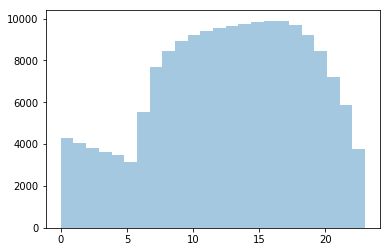

time: 303 ms


In [80]:
# plt.hist(time_list_hour)
ax = sns.distplot(time_list_hour, bins = 24, kde = False)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


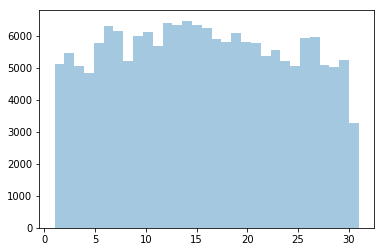

time: 343 ms


In [82]:
ax = sns.distplot(time_list_day, bins=31, kde = False)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


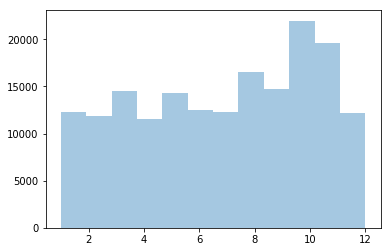

time: 291 ms


In [83]:
ax = sns.distplot(time_list_month, bins = 12, kde = False)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


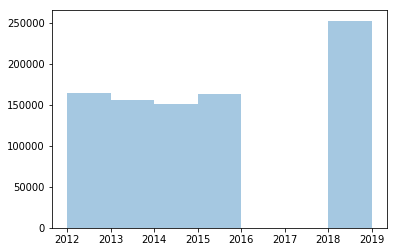

time: 469 ms


In [89]:
ax = sns.distplot(time_list_year, bins = 7, kde = False)

In [84]:
x = [h.get_height() for h in ax.patches]

print(x, len(x) )

[12265.0, 11905.0, 14475.0, 11542.0, 14301.0, 12535.0, 12343.0, 16508.0, 14767.0, 21982.0, 19564.0, 12184.0] 12
time: 2.69 ms


In [96]:
#num permits by year
data['StartDateTime'].dt.year.value_counts()

2018    9010
2015    8958
2013    8094
2014    7962
2012    6910
2019    3560
Name: StartDateTime, dtype: int64

time: 34.2 ms
